# Filepaths in datajoint example
Following is taken from multiple sources, mostly:
- https://docs.datajoint.io/python/definition/06.5-External-Data.html?highlight=stage#filepath-datatype (example)
- https://docs.datajoint.io/python/admin/5-blob-config.html# (bit about 10MB)

DataJoint organizes most of its data in a relational database. Relational databases excel at representing relationships between entities and storing structured data. However, relational databases are not particularly well-suited for storing large continuous chunks of data such as images, signals, and movies. An attribute of type longblob can contain an object up to 4 GiB in size (after compression) but storing many such large objects may hamper the performance of queries on the entire table. A good rule of thumb is that objects over 10 MiB in size should not be put in the relational database.

The `filepath` attribute type links DataJoint records to files already managed outside of DataJoint. This can aid in sharing data with other systems such as allowing an image viewer application to directly use files from a DataJoint pipeline, or to allow downstream tables to reference data which reside outside of DataJoint pipelines.

The main thing is to set up a store in your config settings, and then make a table that includes a filepath as a data type. Then you should be able to access that filepath and do what you want with the data you've got there.

In [7]:
import datajoint as dj
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ['FILEPATH_FEATURE_SWITCH'] = 'True'
os.environ['DJ_SUPPORT_FILEPATH_MANAGEMENT'] = 'True'  #otherwise the world explodes

In [ ]:
user = 'root'
password = 'your_password' #replace with your password

In [22]:
image_dir = os.path.abspath('./images')
print(image_dir)

dj.config['stores'] = {
  'data': {
    'protocol': 'file',
    'location': image_dir, #'/images' failed
    'stage': image_dir  #'/images' failed 
  }
}

C:\Users\Eric\dj-filepaths-example\images


In [10]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = user # replace with your username
dj.config['database.password'] = password # replace with your pw

In [12]:
schema = dj.schema(schema_name = 'path_tutorial', context = locals())  #locals just returns current scope local variables

## Get the paths to the original images
Just get the file paths. 

Question: why not just store them as strings? Is that different from what is happening on the back end?

In [26]:
# Extract image paths (note could use Path/glob but trying to keep it simple for now)
image_names = os.listdir(image_dir)
image_paths = [image_dir + '\\' + image_name for image_name in image_names]
cuteness = [1, 1, 1, 0, 0, 1, 1]
image_paths

['C:\\Users\\Eric\\dj-filepaths-example\\images\\cd00.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd01.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd02.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd03.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd04.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd05.png',
 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd06.png']

## Create your table 
Let's keep it simple. Let's pretend there is one table that contains metadata about your images, and the filepath to the images.

In [27]:
@schema
class AnimalImages(dj.Manual):
    definition = """
    image_id:    int  #primary key
    ---
    image_path:  filepath@data  #filepath to image
    cute: BOOL  #true or false if cute (0/1 could use tinyint(1))
    """

In [28]:
images = AnimalImages()
images

image_id primary key,image_path filepath to image,cute true or false if cute (0/1 could use tinyint(1))


In [19]:
# if you wanted to add a single guy 
# dat_single = {'image_id': 0, 'image_path': image_paths[0]}
# images.insert1(dat_single)
# images

Build up data dictionary.

In [29]:
dat_list = [{'image_id': ind, 
             'image_path': image_path,
             'cute': cuteness[ind]} for (ind, image_path) in enumerate(image_paths)]
dat_list

[{'image_id': 0,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd00.png',
  'cute': 1},
 {'image_id': 1,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd01.png',
  'cute': 1},
 {'image_id': 2,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd02.png',
  'cute': 1},
 {'image_id': 3,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd03.png',
  'cute': 0},
 {'image_id': 4,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd04.png',
  'cute': 0},
 {'image_id': 5,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd05.png',
  'cute': 1},
 {'image_id': 6,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd06.png',
  'cute': 1}]

In [30]:
images.insert(dat_list)
images

image_id primary key,image_path filepath to image,cute true or false if cute (0/1 could use tinyint(1))
0,=BLOB=,1
1,=BLOB=,1
2,=BLOB=,1
3,=BLOB=,0
4,=BLOB=,0
5,=BLOB=,1
6,=BLOB=,1


## Ok cool now use it
Basic fetch and stuff.

In [31]:
images.fetch(as_dict = True)

[{'image_id': 0,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd00.png',
  'cute': 1},
 {'image_id': 1,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd01.png',
  'cute': 1},
 {'image_id': 2,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd02.png',
  'cute': 1},
 {'image_id': 3,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd03.png',
  'cute': 0},
 {'image_id': 4,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd04.png',
  'cute': 0},
 {'image_id': 5,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd05.png',
  'cute': 1},
 {'image_id': 6,
  'image_path': 'C:\\Users\\Eric\\dj-filepaths-example\\images\\cd06.png',
  'cute': 1}]

In [32]:
images

image_id primary key,image_path filepath to image,cute true or false if cute (0/1 could use tinyint(1))
0,=BLOB=,1
1,=BLOB=,1
2,=BLOB=,1
3,=BLOB=,0
4,=BLOB=,0
5,=BLOB=,1
6,=BLOB=,1


In [33]:
images & 'cute = 0'

image_id primary key,image_path filepath to image,cute true or false if cute (0/1 could use tinyint(1))
3,=BLOB=,0
4,=BLOB=,0


Convert to pandas see how it displays in there

In [34]:
images_df = pd.DataFrame(images.fetch())
images_df.head()

,image_id,image_path,cute
0,0,C:\Users\Eric\dj-filepaths-example\images\cd00...,1
1,1,C:\Users\Eric\dj-filepaths-example\images\cd01...,1
2,2,C:\Users\Eric\dj-filepaths-example\images\cd02...,1
3,3,C:\Users\Eric\dj-filepaths-example\images\cd03...,0
4,4,C:\Users\Eric\dj-filepaths-example\images\cd04...,0


## Use it: show an image
Obviously there are a lot of things you can do with filepaths. The main things you typically want to do first is load the data. Let's do that since this is a simple example.

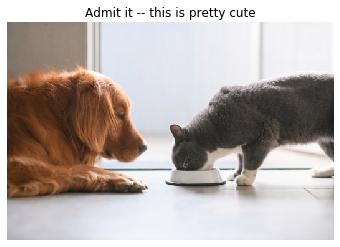

In [35]:
image_ind = 1
image_path = (images & f'image_id = {image_ind}').fetch('image_path')[0]
cuteness = (images & f'image_id = {image_ind}').fetch('cute')[0]
im = plt.imread(image_path)
plt.imshow(im);
plt.title('Admit it -- this is pretty cute') if cuteness else plt.title('Sorry not cute')
plt.axis('off');

This is just a simple example you could do a hell of a lot more!

## Sources for images

The images (cats, dogs, and a fish) are from:

- https://huggablemuggs.com/8-tricks-to-help-your-cat-and-dog-to-get-along/
- https://2catsandablog.wordpress.com/2018/08/14/do-cats-and-dogs-really-fight-like-cats-and-dogs/
- http://www.waycooldogs.com/feeding-cats-dogs-together/
- https://phz8.petinsurance.com/ownership-adoption/pet-ownership/pet-behavior/7-tips-on-combining-multi-pet-household
- https://www.mercurynews.com/2019/04/15/whos-going-to-tell-mom-shes-feeding-her-dogs-the-wrong-food/
- https://www.meowingtons.com/blogs/lolcats/snuggly-cat-and-dog-best-friends-to-cheer-you-up
- https://www.thesprucepets.com/cute-aquarium-sea-critters-4146506
